In [2]:
import os
import pandas as pd
import seaborn
import matplotlib
%matplotlib inline

boston = pd.read_csv('Boston.csv')

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston.info()

In [ ]:
boston.describe()

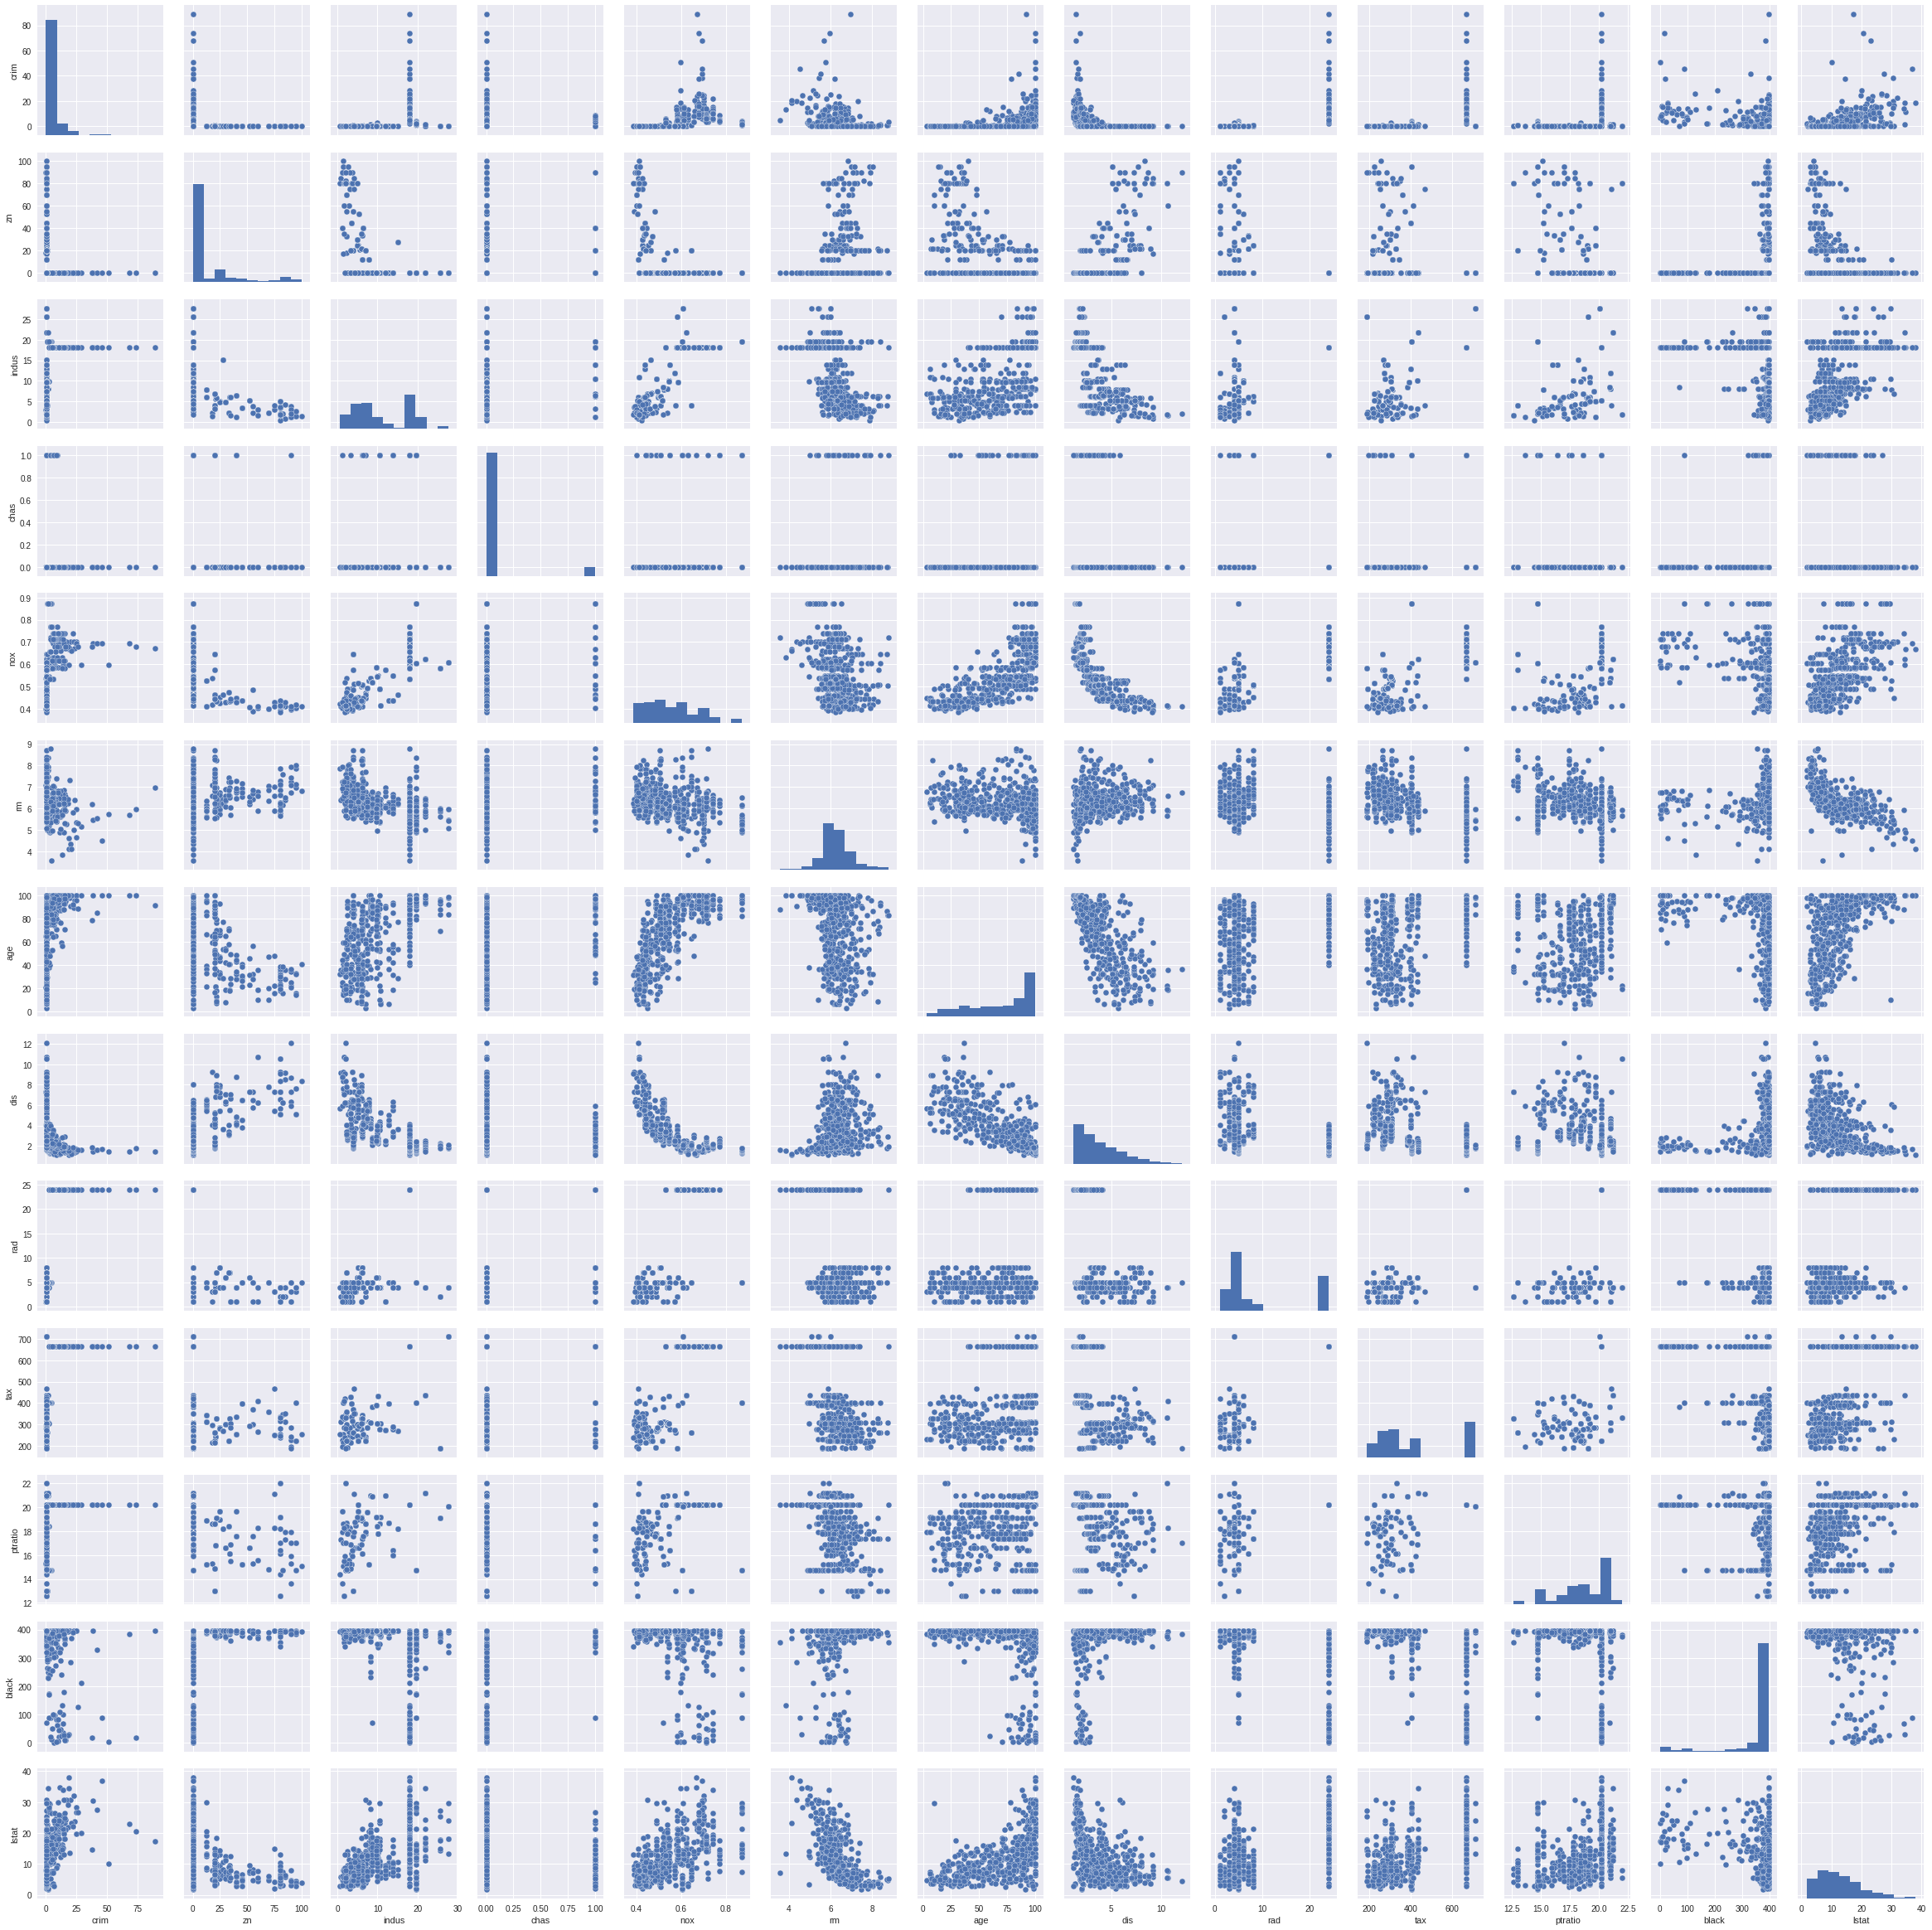

In [4]:
seaborn.pairplot(boston.iloc[:, 0:13])
# Crime rates per capita seem to be correlated to proportion of owner-occupied units built 
# prior to 1940, weighted mean of distances to five Boston employment centres, index of 
# accessibility to radial highways, pupil-teacher ratio by town, and tax rates.
# From now on, I will use variable names:
# zn seems to be correlated to age, lstat, nox, and indus.
# lstat seems to be correlated to nox and maybe dis.

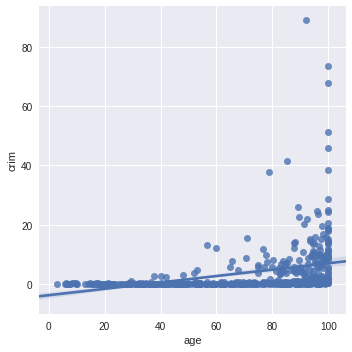

In [8]:
# crim seems to be related to age. From the plot below, we can hypothesize that older homes 
# mean more crime.
seaborn.lmplot(x = 'age', y = 'crim', data = boston)

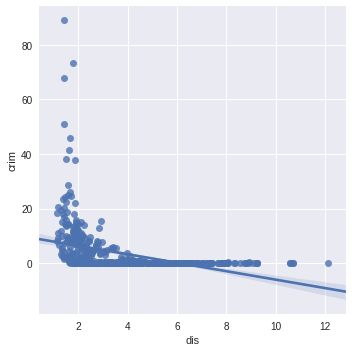

In [9]:
# crim seems to be related to dis. From the plot below, we can hypothesize that the closer to 
# the work-area, the more crime.
seaborn.lmplot(x = 'dis', y = 'crim', data = boston)

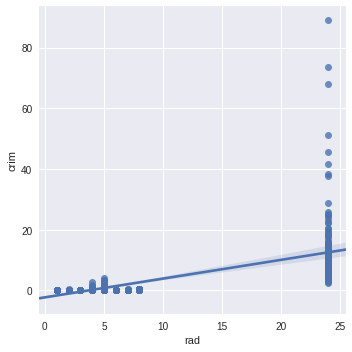

In [11]:
# crim seems to be related to rad. From the plot below, we can hypothesize that more  
# accessibility to radial highways means more crime.
seaborn.lmplot(x = 'rad', y = 'crim', data = boston)

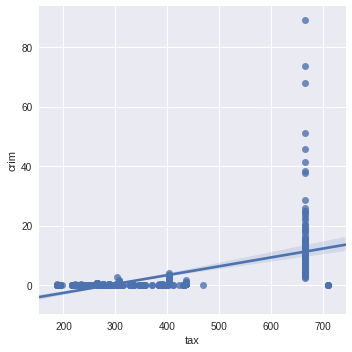

In [18]:
# crim seems to be related to tax. From the plot below, we can hypothesize that higher tax
# rates mean more crime.
seaborn.lmplot(x = 'tax', y = 'crim', data = boston)

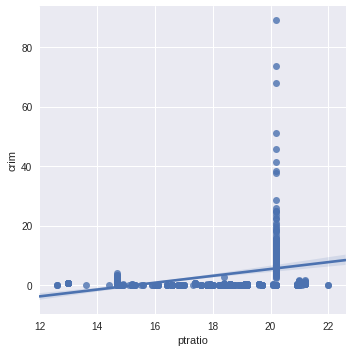

In [12]:
# crim seems to be related to ptratio. From the plot below, we can hypothesize that higher 
# pupil:teacher ratio means more crime.
seaborn.lmplot(x = 'ptratio', y = 'crim', data = boston)

In [13]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


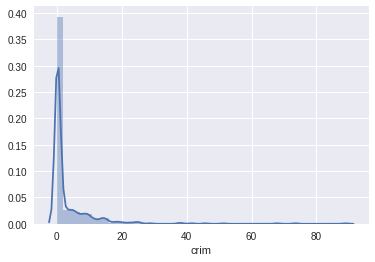

In [16]:
boston.groupby('crim').size()
bostonHighCrime = boston[boston['crim'] > 15]
bostonHighCrime.count()
seaborn.distplot(boston['crim'])

In [ ]:
# Crime rates range from 0.006320 to 88.976200 and the mean is 3.613524 so clearly there are
# much more suburbs with crime rates lower than the mean. There are 30 suburbs with crime rate
# per capita higher than 15. There is a pretty long tail in the graph so there are many suburbs
# with relatively high crime rates.

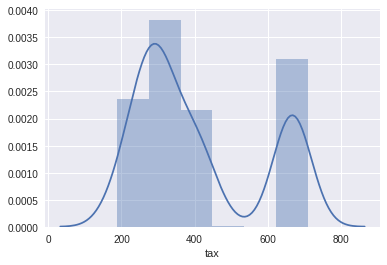

In [17]:
seaborn.distplot(boston['tax'])

In [ ]:
# Tax rates range from 187 to 711 and the mean is 408.237154. From the graph above, we can see 
# that tax rates peak at two different ranges: around 300 and around 650. The suburbs with 
# lower tax rates are spread out around 300 but the ones with higher tax rates are mostly 
# concentrated around the 650 mark.

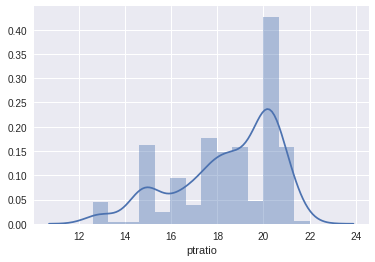

In [19]:
seaborn.distplot(boston['ptratio'])

In [ ]:
# Pupil:teacher ratios range from 12.6 to 22 and the mean is 18.455534. From the graph above, 
# we can see there are more high ratios than low ones, but there does not seem to be a huge
# outlier in the set.

In [24]:
bostonCharlesRiver = boston[boston['chas'] == 1]
bostonCharlesRiver.info()
# There are 35 suburbs bound by the Charles River.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 142 to 372
Data columns (total 14 columns):
crim       35 non-null float64
zn         35 non-null float64
indus      35 non-null float64
chas       35 non-null int64
nox        35 non-null float64
rm         35 non-null float64
age        35 non-null float64
dis        35 non-null float64
rad        35 non-null int64
tax        35 non-null int64
ptratio    35 non-null float64
black      35 non-null float64
lstat      35 non-null float64
medv       35 non-null float64
dtypes: float64(11), int64(3)
memory usage: 4.1 KB


In [25]:
boston.describe()
# The median pupil:teacher ratio is the number in row "50%" and column "ptratio": 19.05.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
minMedv = boston[boston['medv'] == 5]
minMedv
# Both suburbs 398 and 405 have the minimum median value of owner occupied homes. They both 
# have comparatively high crime rates per capita. There is a lot of land zoned for lots over 
# 25,000 sqft. They are not bound by the Charles river. They have high nitrogen oxyde 
# concentration. They have very old homes. They probably have average-sized homes because
# homes contain on average about 5.5 rooms. They are close to work-areas. They are extremely 
# accessible to radial highways. They have very high pupil:teacher ratios. They have relatively
# big lower-status populations.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [27]:
bostonMoreThan7Rooms = boston[boston['rm'] > 7]
bostonMoreThan7Rooms.info()
# There are 64 suburbs that average more than 7 rooms per home.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 2 to 482
Data columns (total 14 columns):
crim       64 non-null float64
zn         64 non-null float64
indus      64 non-null float64
chas       64 non-null int64
nox        64 non-null float64
rm         64 non-null float64
age        64 non-null float64
dis        64 non-null float64
rad        64 non-null int64
tax        64 non-null int64
ptratio    64 non-null float64
black      64 non-null float64
lstat      64 non-null float64
medv       64 non-null float64
dtypes: float64(11), int64(3)
memory usage: 7.5 KB


In [30]:
bostonMoreThan8Rooms = boston[boston['rm'] > 8]
bostonMoreThan8Rooms.info()
# There are 13 suburbs that average more than 8 rooms per home.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 97 to 364
Data columns (total 14 columns):
crim       13 non-null float64
zn         13 non-null float64
indus      13 non-null float64
chas       13 non-null int64
nox        13 non-null float64
rm         13 non-null float64
age        13 non-null float64
dis        13 non-null float64
rad        13 non-null int64
tax        13 non-null int64
ptratio    13 non-null float64
black      13 non-null float64
lstat      13 non-null float64
medv       13 non-null float64
dtypes: float64(11), int64(3)
memory usage: 1.5 KB


In [31]:
bostonMoreThan8Rooms
# These suburbs have comparatively low crime rates. Also, they have comparatively proportions 
# of lower-status populations.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
